In [255]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import  VotingClassifier

In [130]:
df = pd.read_csv('C:/Users/USER/DA_Projects/NASA-Asteroids-Classification/asteroid_data_cleaned.csv')

In [131]:
df.info()
#all features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   absolute_magnitude_h         4687 non-null   float64
 1   est_dia_min(km)              4687 non-null   float64
 2   est_dia_max(km)              4687 non-null   float64
 3   relative_velocity(km/h)      4687 non-null   float64
 4   miss_distance(km)            4687 non-null   float64
 5   orbit_uncertainty            4687 non-null   int64  
 6   minimum_orbit_intersection   4687 non-null   float64
 7   jupiter_tisserand_invariant  4687 non-null   float64
 8   epoch_osculation             4687 non-null   float64
 9   eccentricity                 4687 non-null   float64
 10  semi_major_axis              4687 non-null   float64
 11  inclination                  4687 non-null   float64
 12  ascending_node_longitude     4687 non-null   float64
 13  orbital_period    

In [132]:
df.columns

Index(['absolute_magnitude_h', 'est_dia_min(km)', 'est_dia_max(km)',
       'relative_velocity(km/h)', 'miss_distance(km)', 'orbit_uncertainty',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination',
       'ascending_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_argument', 'aphelion_distance', 'perihelion_time',
       'mean_anomaly', 'mean_motion', 'hazardous'],
      dtype='object')

In [133]:
df.head()

,absolute_magnitude_h,est_dia_min(km),est_dia_max(km),relative_velocity(km/h),miss_distance(km),orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,...,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,0.284472,22017.003799,62753692.0,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,65210.346095,57298148.0,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,27326.560182,7622911.5,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,40225.948191,42683616.0,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,35426.991794,61010824.0,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [134]:
df.describe()

,absolute_magnitude_h,est_dia_min(km),est_dia_max(km),relative_velocity(km/h),miss_distance(km),orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,...,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,50294.919829,3.841347e+07,3.516962,0.082320,5.056111,2.457724e+06,0.382569,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,0.826391,26255.601377,2.181110e+07,3.078307,0.090300,1.237818,9.202975e+02,0.180444,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.002260,1207.814804,2.660989e+04,0.000000,0.000002,2.196000,2.450164e+06,0.007522,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,30358.313370,1.995928e+07,0.000000,0.014585,4.049500,2.458000e+06,0.240858,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,0.247765,46504.401181,3.964771e+07,3.000000,0.047365,5.071000,2.458000e+06,0.372450,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,0.567597,65079.535405,5.746863e+07,6.000000,0.123593,6.019000,2.458000e+06,0.512411,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,34.836938,160681.487851,7.478160e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [135]:
df.shape

(4687, 21)

In [136]:
df.isnull().any()
#no missing data.

absolute_magnitude_h           False
est_dia_min(km)                False
est_dia_max(km)                False
relative_velocity(km/h)        False
miss_distance(km)              False
orbit_uncertainty              False
minimum_orbit_intersection     False
jupiter_tisserand_invariant    False
epoch_osculation               False
eccentricity                   False
semi_major_axis                False
inclination                    False
ascending_node_longitude       False
orbital_period                 False
perihelion_distance            False
perihelion_argument            False
aphelion_distance              False
perihelion_time                False
mean_anomaly                   False
mean_motion                    False
hazardous                      False
dtype: bool

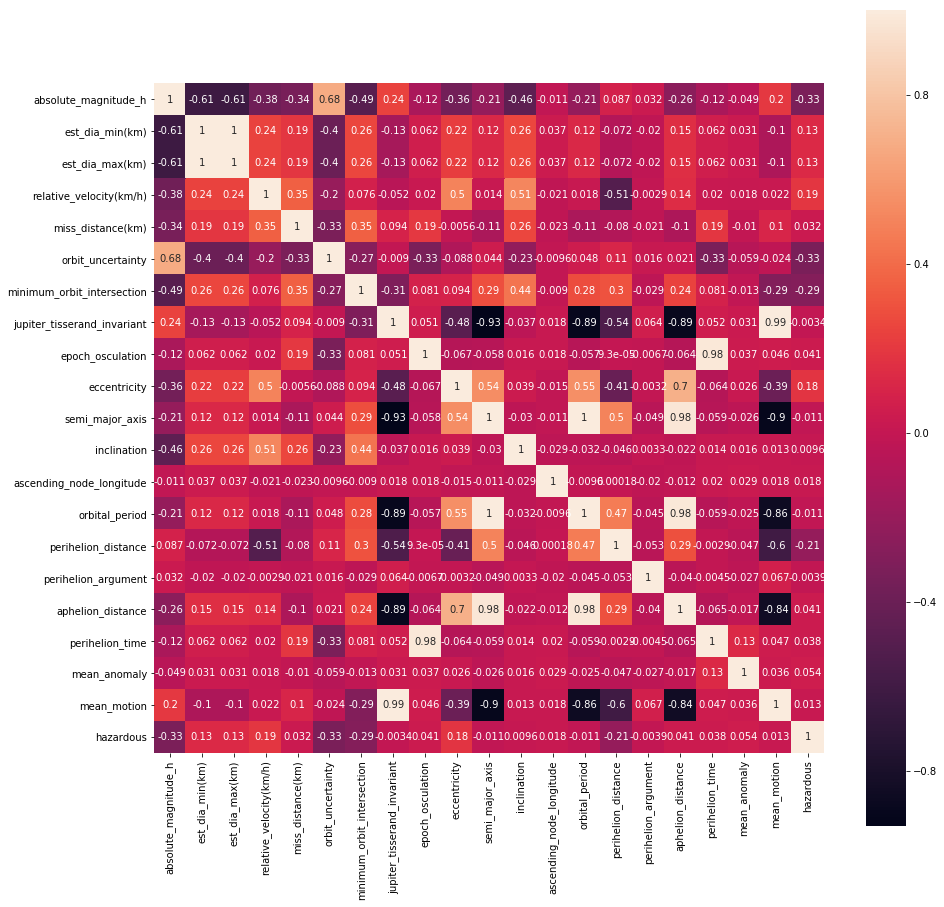

In [137]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), square = True, annot = True)

In [138]:
#according to the heatmap above, there are two pair of columns having similar measure in the dataset. let's exclude them.
df.drop(['semi_major_axis','est_dia_min(km)'], axis = 1,  inplace = True)

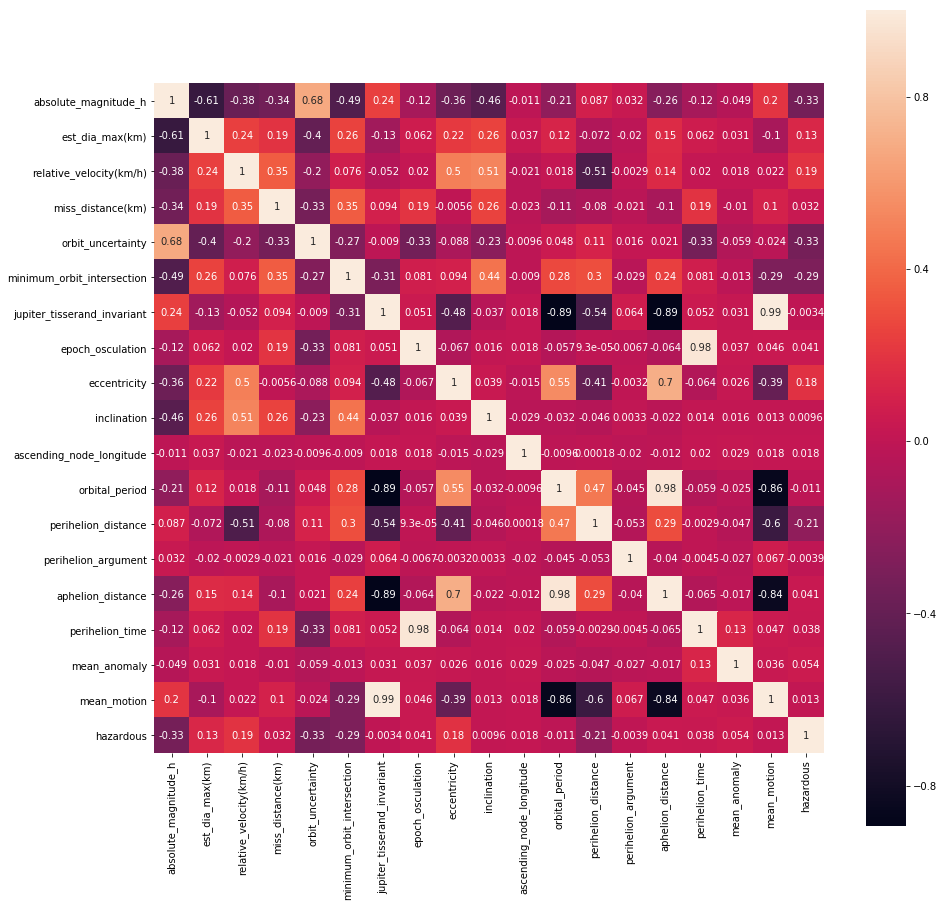

In [139]:
#final haetmap after dimensionality reduction.
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), square = True, annot = True)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


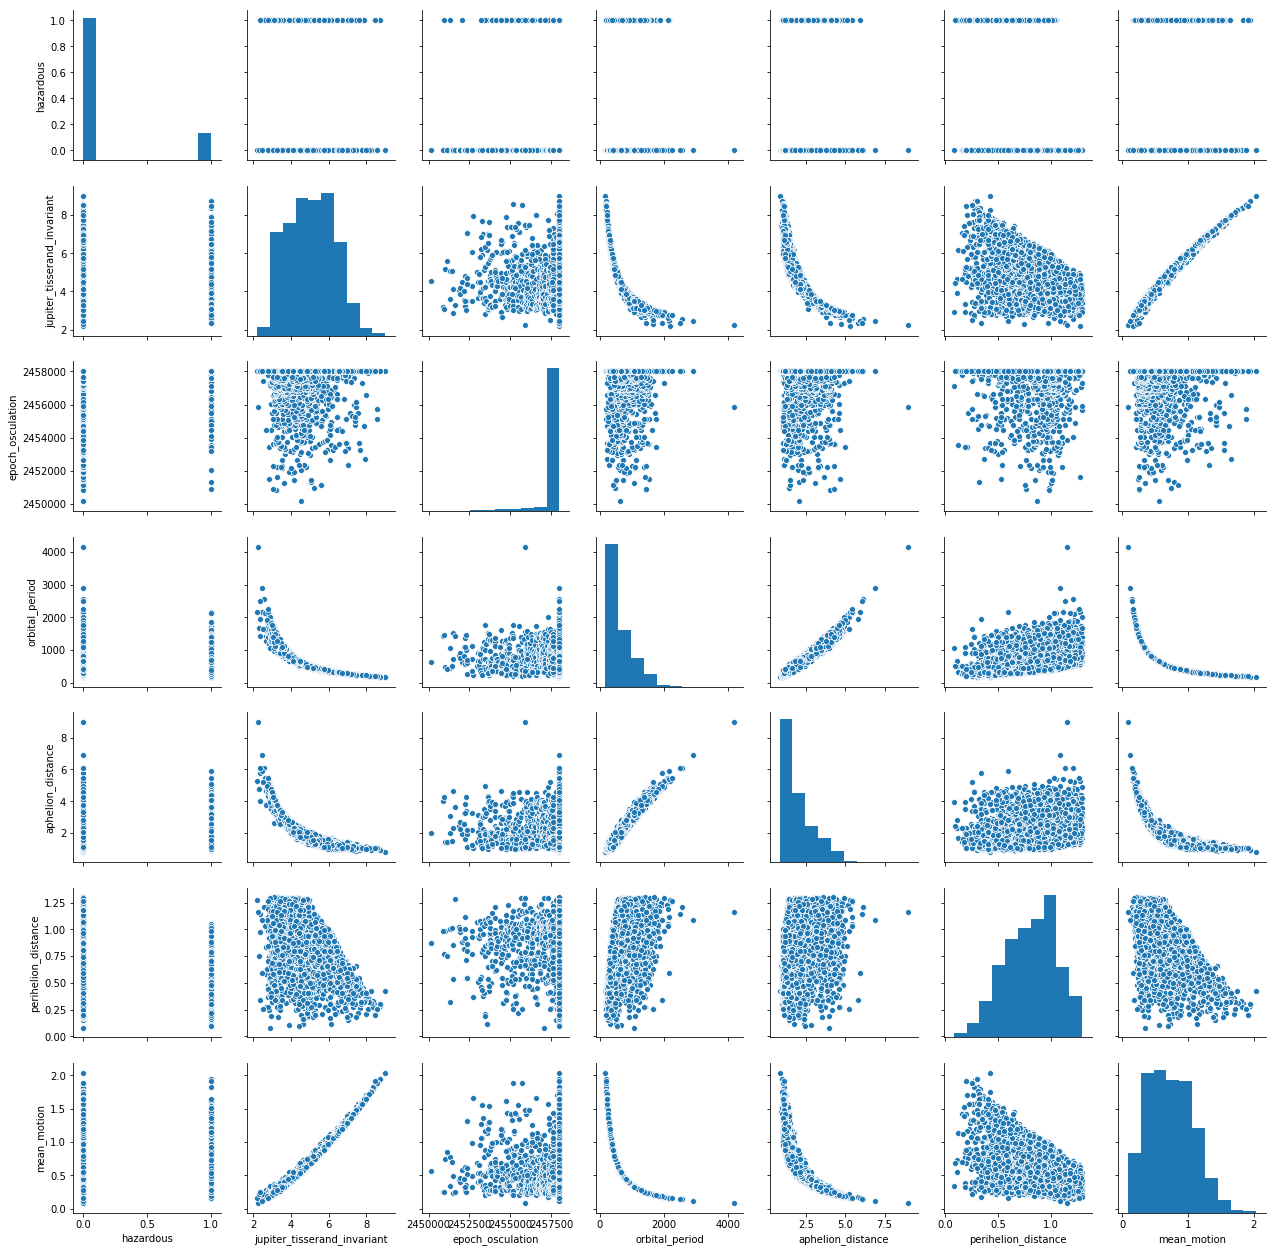

In [140]:
#let's plot a pair plot of variables having high correlations.
cols = ['hazardous', 'jupiter_tisserand_invariant', 'epoch_osculation', 'orbital_period', 'aphelion_distance', 'perihelion_distance', 'mean_motion']
sns.pairplot(df[cols], size = 2.5)
plt.show()

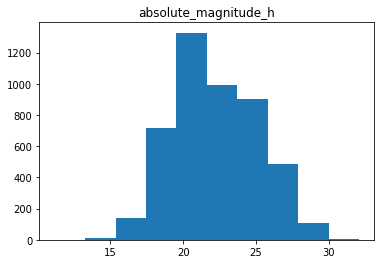

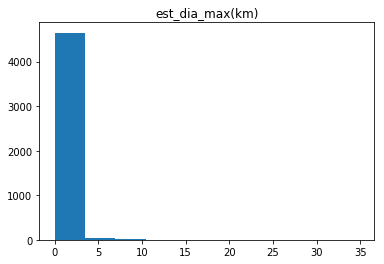

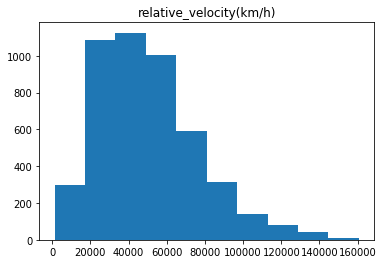

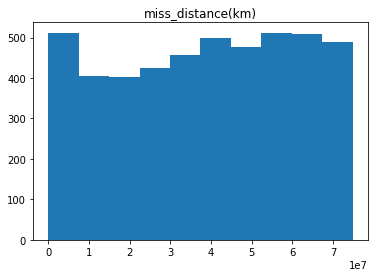

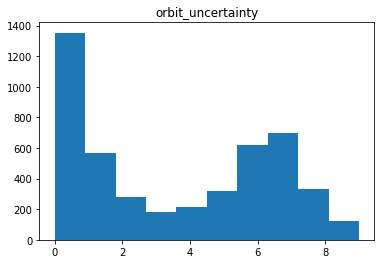

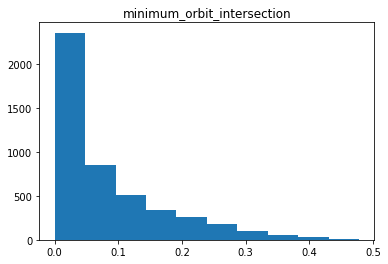

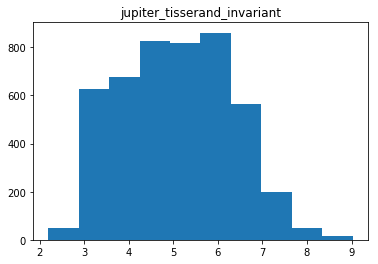

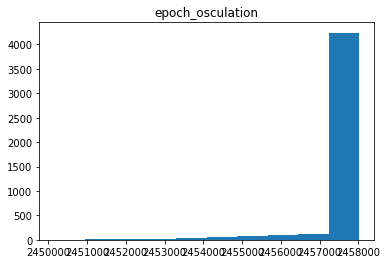

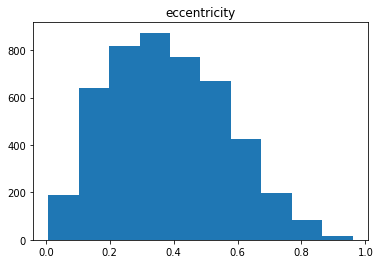

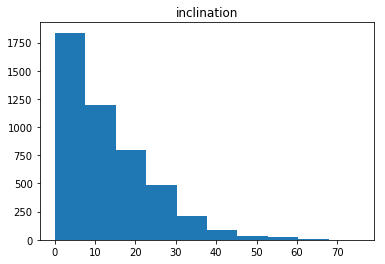

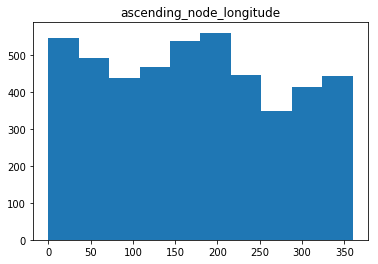

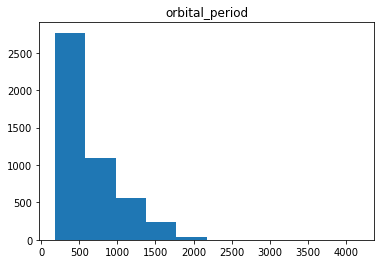

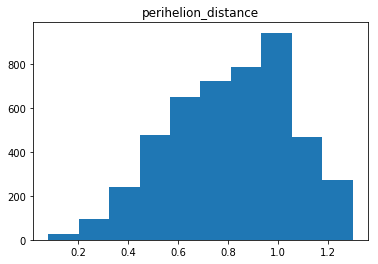

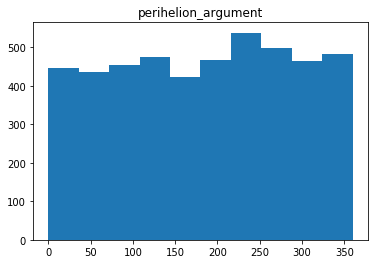

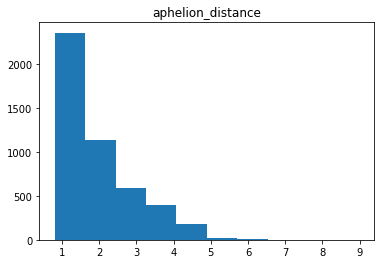

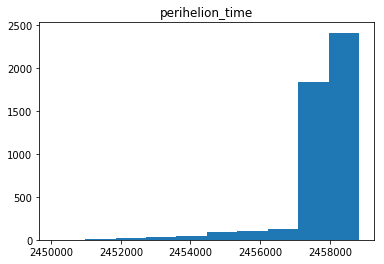

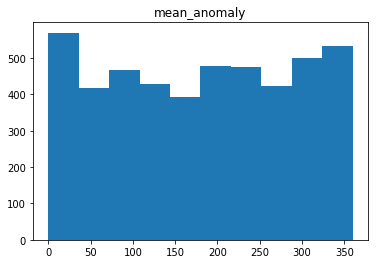

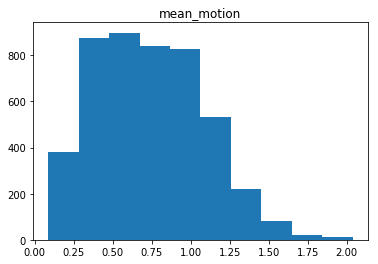

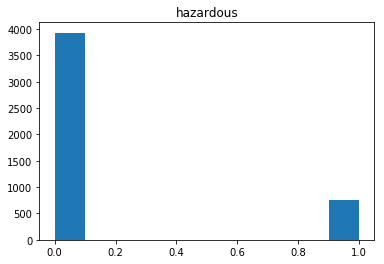

In [144]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [155]:
print(df.corr() > .3)

                             absolute_magnitude_h  est_dia_max(km)  \
absolute_magnitude_h                         True            False   
est_dia_max(km)                             False             True   
relative_velocity(km/h)                     False            False   
miss_distance(km)                           False            False   
orbit_uncertainty                            True            False   
minimum_orbit_intersection                  False            False   
jupiter_tisserand_invariant                 False            False   
epoch_osculation                            False            False   
eccentricity                                False            False   
inclination                                 False            False   
ascending_node_longitude                    False            False   
orbital_period                              False            False   
perihelion_distance                         False            False   
perihelion_argument 

In [154]:
print(df.corr()['hazardous'])

absolute_magnitude_h          -0.325522
est_dia_max(km)                0.132424
relative_velocity(km/h)        0.191970
miss_distance(km)              0.032407
orbit_uncertainty             -0.328721
minimum_orbit_intersection    -0.288949
jupiter_tisserand_invariant   -0.003404
epoch_osculation               0.040940
eccentricity                   0.183269
inclination                    0.009607
ascending_node_longitude       0.017536
orbital_period                -0.011168
perihelion_distance           -0.207027
perihelion_argument           -0.003865
aphelion_distance              0.040800
perihelion_time                0.038113
mean_anomaly                   0.054164
mean_motion                    0.013028
hazardous                      1.000000
Name: hazardous, dtype: float64


In [156]:
print(df.corr()['hazardous'] > 0.3)

absolute_magnitude_h           False
est_dia_max(km)                False
relative_velocity(km/h)        False
miss_distance(km)              False
orbit_uncertainty              False
minimum_orbit_intersection     False
jupiter_tisserand_invariant    False
epoch_osculation               False
eccentricity                   False
inclination                    False
ascending_node_longitude       False
orbital_period                 False
perihelion_distance            False
perihelion_argument            False
aphelion_distance              False
perihelion_time                False
mean_anomaly                   False
mean_motion                    False
hazardous                       True
Name: hazardous, dtype: bool


In [159]:
df['hazardous'].value_counts()

0    3932
1     755
Name: hazardous, dtype: int64

In [160]:
df.shape

(4687, 19)

In [167]:
dummy = df.copy()

In [169]:
#model_building
#splitting to train and test sets
y = dummy['hazardous']
X = dummy.drop('hazardous', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [170]:
X_train.shape

(3749, 18)

In [171]:
X_test.shape

(938, 18)

In [173]:
#applying StandardScaler() to normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
X_test_scaled[0]

array([ 1.40021847, -0.49724412, -0.17020041, -1.56213167,  1.782971  ,
       -0.64124375, -1.08979481, -0.84175589,  0.888242  , -0.71712603,
       -1.34247326,  0.96258478,  0.30601732,  1.10151231,  1.0633291 ,
       -0.88077431, -1.54359916, -1.08762393])

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [181]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.95866667 0.94266667 0.94666667 0.952      0.94125501]
0.9482510013351135


In [183]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.96266667 0.94533333 0.94133333 0.95066667 0.95727637]
0.9514552736982644


In [184]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.83733333 0.836      0.83733333 0.83733333 0.83711615]
0.8370232309746329


In [185]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.99866667 0.99466667 0.99466667 0.99733333 0.99599466]
0.996265598575879


In [186]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.99866667 0.99466667 0.99466667 0.99733333 0.99599466]
0.996265598575879


In [187]:
knc = KNeighborsClassifier()
cv = cross_val_score(knc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.89733333 0.89733333 0.888      0.87733333 0.89185581]
0.8903711615487315


In [188]:
knc = KNeighborsClassifier()
cv = cross_val_score(knc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.812      0.812      0.808      0.808      0.81708945]
0.8114178905206944


In [189]:
rfc = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rfc, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.99866667 0.992      0.99066667 0.99866667 0.99732977]
0.9954659546061416


In [190]:
rfc = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rfc, X_train_scaled, y_train, cv =5)
print(cv)
print(cv.mean())

[0.99866667 0.992      0.99066667 0.99866667 0.99732977]
0.9954659546061416


In [191]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train, y_train, cv= 5)
print(cv)
print(cv.mean())

[0.83733333 0.83733333 0.83733333 0.83733333 0.83711615]
0.8372898976412996


In [193]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr),('knc',knc),('rfc',rfc),('gnb',gnb),('svc',svc)], voting = 'soft')
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.984      0.95866667 0.95866667 0.98       0.97863818]
0.971994303515799


In [208]:
type(X_test_scaled)

numpy.ndarray

In [211]:
y_train = y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [212]:
y_test = y_test.to_numpy()

In [218]:
voting_model = voting_clf.fit(X_train_scaled, y_train)
prediction = voting_clf.predict(X_test_scaled).astype(int)
print('accuracy of train set:', voting_model.score(X_train_scaled, y_train))
print('accuracy of test set:', voting_model.score(X_test_scaled, y_test))

accuracy of train set: 0.9823953054147773
accuracy of test set: 0.976545842217484


Text(78.90000000000006, 0.5, 'True Labels')

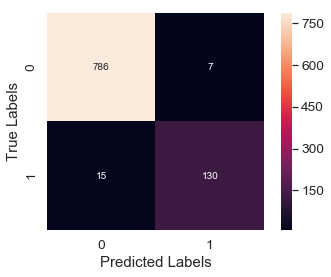

In [231]:
cm = confusion_matrix(y_test, prediction)
ax = sns.heatmap(cm, square = True, annot = True, fmt = 'g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [232]:
#Model Tuned Performance
from sklearn.model_selection import GridSearchCV
def clf_performance(classifier, model_name):
    print(model_name)
    print("Best score : " + str(classifier.best_score_))
    print("Best Parameters : " + str(classifier.best_params_))

In [234]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


Logistic Regression
Best score : 0.9530563417890521
Best Parameters : {'C': 29.763514416313132, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [244]:
gnb = GaussianNB()
param_grid = {
              'var_smoothing' : [1e-9, 2e-9, 3e-9]
             }
clf_gnb = GridSearchCV(gnb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_gnb = clf_gnb.fit(X_train_scaled, y_train)
clf_performance(best_clf_gnb, 'GaussianNB')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GaussianNB
Best score : 0.9482510013351135
Best Parameters : {'var_smoothing': 1e-09}


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.3s finished


In [247]:
dt = tree.DecisionTreeClassifier()
param_grid = {'criterion' : ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth' : [12, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30]
              }
clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dt = clf_dt.fit(X_train_scaled, y_train)
clf_performance(best_clf_dt, 'DecisionTreeClassifier')

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeClassifier
Best score : 0.9967992879394749
Best Parameters : {'criterion': 'gini', 'max_depth': 26, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    1.7s finished


In [248]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv =5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.5s finished


KNN
Best score : 0.9306470850022253
Best Parameters : {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [250]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators' : [3, 5, 7, 9, 15, 20, 25, 30 ,40, 50, 60, 70],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 20, 40, 60, 70, 80, 90, 100], 
             'max_features' : ['auto', 'sqrt', 'log2', 'int', 'float']}
clf_rfc = GridSearchCV(rfc, param_grid = param_grid, cv =5, verbose = True, n_jobs = -1)
best_clf_rfc = clf_rfc.fit(X_train_scaled, y_train)
clf_performance(best_clf_rfc, 'RandomForestClassifier')

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2191 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4287 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  5.8min finished


RandomForestClassifier
Best score : 0.9975999999999999
Best Parameters : {'criterion': 'entropy', 'max_depth': 80, 'max_features': 'auto', 'n_estimators': 20}


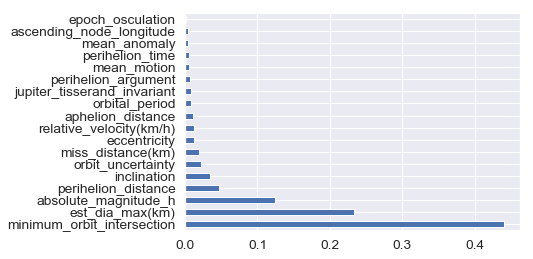

In [252]:
best_rfc = best_clf_rfc.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd. Series(best_rfc.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [253]:
#Model Additional Ensemble Approaches
best_lr = best_clf_lr.best_estimator_
best_gnb = best_clf_gnb.best_estimator_
best_dt = best_clf_dt.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_rfc = best_clf_rfc.best_estimator_

In [256]:
voting_clf_final = VotingClassifier(estimators = [('lr', best_lr), ('gnb', best_gnb), ('dt', best_dt), ('knn', best_knn), ('rfc', best_rfc)])
print('voting_clf_final :', cross_val_score(voting_clf_final, X_train, y_train, cv = 5))
print('voting_clf_final_mean :', cross_val_score(voting_clf_final, X_train, y_train, cv = 5).mean())
print('voting_clf_final scaled :', cross_val_score(voting_clf_final, X_train_scaled, y_train, cv = 5))
print('voting_clf_final scaled mean:', cross_val_score(voting_clf_final, X_train_scaled, y_train, cv = 5).mean())


voting_clf_final : [0.86933333 0.86266667 0.852      0.85733333 0.85714286]
voting_clf_final_mean : 0.8599622607921674
voting_clf_final scaled : [0.99466667 0.98133333 0.98       0.988      0.99732977]
voting_clf_final scaled mean: 0.9879985758789498


In [257]:
final_voting_model = voting_clf_final.fit(X_train_scaled, y_train)
prediction_final = voting_clf_final.predict(X_test_scaled).astype(int)
print('accuracy of train set:', final_voting_model.score(X_train_scaled, y_train))
print('accuracy of test set:', final_voting_model.score(X_test_scaled, y_test))

accuracy of train set: 1.0
accuracy of test set: 0.990405117270789


Text(78.90000000000006, 0.5, 'True Labels')

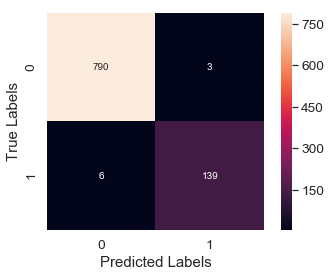

In [259]:
cm = confusion_matrix(y_test, prediction_final)
ax = sns.heatmap(cm, square = True, annot = True, fmt = 'g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)